In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("Academic-Performance-Dataset - Academic-Performance-Dataset (2).csv")
df

,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72,62.0,98.0,63.0,89.0,36,368,73.6
1,2,Reyansh,M,IT,58,62.0,83.0,83.0,88.0,34,350,70.0
2,3,Aarav,M,IT,57,-20.0,100.0,NaN,56.0,36,192,38.4
3,4,Atharv,M,IT,60,89.0,83.0,70.0,33.0,23,298,59.6
4,5,Vivaan,M,Comp,85,90.0,NaN,78.0,23.0,56,247,49.4
5,6,Advik,M,ENTC,94,99.0,84.0,100.0,56.0,99,438,87.6
6,7,Ansh,M,ENTC,98,88.0,95.0,81.0,78.0,78,420,84.0
7,8,Ishaan,M,ENTC,75,66.0,51.0,83.0,-99.0,76,192,38.4
8,9,Dhruv,M,ENTC,63,NaN,NaN,97.0,56.0,55,208,41.6
9,10,Siddharth,M,ENTC,96,67.0,78.0,95.0,NaN,98,338,67.6


In [71]:
df.shape


(20, 12)

In [72]:
df.dtypes

Rollno           int64
Name            object
Gender          object
Branch          object
Attendence       int64
Phy_marks      float64
Che_marks      float64
EM1_marks      float64
PPS_marks      float64
SME_marks        int64
Total Marks      int64
Percentage     float64
dtype: object

In [73]:
df.isnull().sum()

Rollno         0
Name           2
Gender         0
Branch         0
Attendence     0
Phy_marks      1
Che_marks      3
EM1_marks      2
PPS_marks      1
SME_marks      0
Total Marks    0
Percentage     0
dtype: int64

In [74]:
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

['Name', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks']

In [75]:
for i in df.columns :
    if(df[i].dtypes == 'object'):
        df[i].fillna(df[i].mode()[0],inplace= True)
    else :
        df[i].fillna(df[i].mean() ,inplace =True)


Q1 = df['Phy_marks'].quantile(0.25)
Q3 = df['Phy_marks'].quantile(0.75)
IQR = Q3 - Q1
high = Q3 + 1.5*IQR
low = Q1 - 1.5*IQR
df = df[(df['Phy_marks'] >= low)&(df['Phy_marks']<=high)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1568\1675268340.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean() ,inplace =True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1568\1675268340.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [76]:
df['Total Marks']=df['Phy_marks']+df['Che_marks']+df['EM1_marks']+df['PPS_marks']+df['SME_marks']
df['Percentage']=df['Total Marks']/5

df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1568\3000049932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Marks']=df['Phy_marks']+df['Che_marks']+df['EM1_marks']+df['PPS_marks']+df['SME_marks']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1568\3000049932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Percentage']=df['Total Marks']/5


,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72,62.000000,98.000000,63.000000,89.000000,36,348.000000,69.600000
1,2,Reyansh,M,IT,58,62.000000,83.000000,83.000000,88.000000,34,350.000000,70.000000
3,4,Atharv,M,IT,60,89.000000,83.000000,70.000000,33.000000,23,298.000000,59.600000
4,5,Vivaan,M,Comp,85,90.000000,80.764706,78.000000,23.000000,56,327.764706,65.552941
5,6,Advik,M,ENTC,94,99.000000,84.000000,100.000000,56.000000,99,438.000000,87.600000
6,7,Ansh,M,ENTC,98,88.000000,95.000000,81.000000,78.000000,78,420.000000,84.000000
7,8,Ishaan,M,ENTC,75,66.000000,51.000000,83.000000,-99.000000,76,177.000000,35.400000
8,9,Dhruv,M,ENTC,63,63.421053,80.764706,97.000000,56.000000,55,352.185759,70.437152
9,10,Siddharth,M,ENTC,96,67.000000,78.000000,95.000000,60.736842,98,398.736842,79.747368
10,11,Vihaan,M,ENTC,82,54.000000,70.000000,88.000000,55.000000,56,323.000000,64.600000


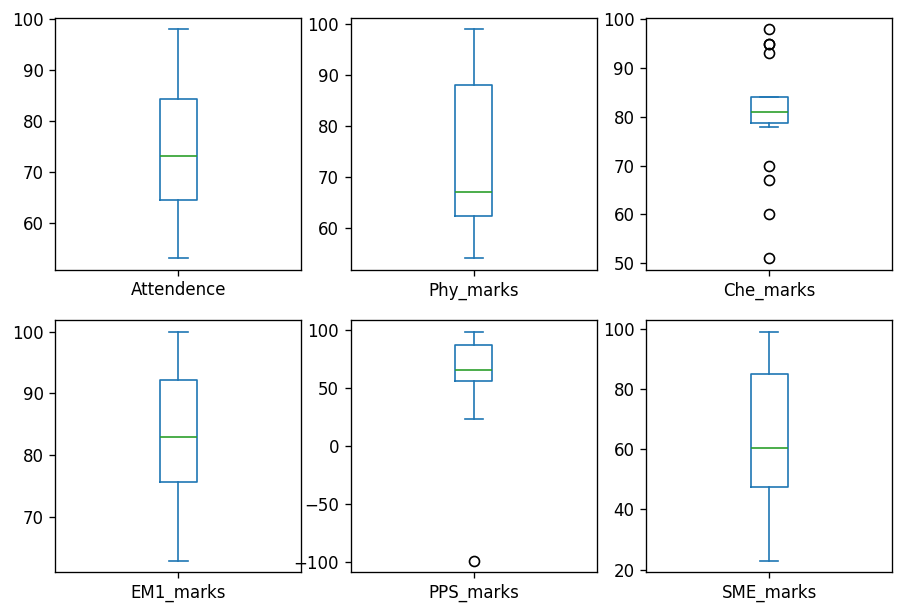

In [77]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6)
df_list = ['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120)

count=0
for r in range(2):
    for c in range(3):
        _ = df[df_list[count]].plot(kind = 'box', ax=axes[r,c])
        count+=1

In [83]:
df.isnull().sum()

Rollno         0
Name           0
Gender         0
Branch         0
Attendence     0
Phy_marks      0
Che_marks      0
EM1_marks      0
PPS_marks      0
SME_marks      0
Total Marks    0
Percentage     0
Grade          0
dtype: int64

In [78]:
Q1 = df['Che_marks'].quantile(0.25)
Q3 = df['Che_marks'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')


Q1 = 78.69117647058823, Q3 = 84.0, IQR = 5.308823529411768, Lower_limit = 70.72794117647058, Upper_limit = 91.96323529411765


In [79]:
df[(df['Che_marks'] < Lower_limit) | (df['Che_marks'] > Upper_limit)]

,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72,62.0,98.0,63.0,89.0,36,348.0,69.6
6,7,Ansh,M,ENTC,98,88.0,95.0,81.0,78.0,78,420.0,84.0
7,8,Ishaan,M,ENTC,75,66.0,51.0,83.0,-99.0,76,177.0,35.4
10,11,Vihaan,M,ENTC,82,54.0,70.0,88.0,55.0,56,323.0,64.6
11,12,Aarav,M,IT,75,64.0,67.0,71.0,66.0,87,355.0,71.0
14,15,Maryam,F,IT,64,87.0,60.0,90.0,65.0,90,392.0,78.4
15,16,Saanvi,F,Comp,66,90.0,95.0,67.0,99.0,77,428.0,85.6
17,18,Inaya,F,Comp,74,67.0,93.0,93.0,87.0,99,439.0,87.8


In [80]:
def BinningFunction(column, cut_points, labels = None) :
    break_points=[column.min()] + cut_points + [column.max( )]
    print('Gradding According to percentage \n>60 = F \n60-70 = B \n70-80 = A\n80-100 = O')
    return pd.cut(column, bins=break_points, labels=labels, include_lowest=True)

In [81]:
cut_points=[60, 70, 80]
labels=['F', 'B', 'A', 'O']
df['Grade']=BinningFunction(df['Percentage'], cut_points, labels)

df

Gradding According to percentage 
>60 = F 
60-70 = B 
70-80 = A
80-100 = O


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1568\522498627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grade']=BinningFunction(df['Percentage'], cut_points, labels)


,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage,Grade
0,1,Mohammed,M,Comp,72,62.000000,98.000000,63.000000,89.000000,36,348.000000,69.600000,B
1,2,Reyansh,M,IT,58,62.000000,83.000000,83.000000,88.000000,34,350.000000,70.000000,B
3,4,Atharv,M,IT,60,89.000000,83.000000,70.000000,33.000000,23,298.000000,59.600000,F
4,5,Vivaan,M,Comp,85,90.000000,80.764706,78.000000,23.000000,56,327.764706,65.552941,B
5,6,Advik,M,ENTC,94,99.000000,84.000000,100.000000,56.000000,99,438.000000,87.600000,O
6,7,Ansh,M,ENTC,98,88.000000,95.000000,81.000000,78.000000,78,420.000000,84.000000,O
7,8,Ishaan,M,ENTC,75,66.000000,51.000000,83.000000,-99.000000,76,177.000000,35.400000,F
8,9,Dhruv,M,ENTC,63,63.421053,80.764706,97.000000,56.000000,55,352.185759,70.437152,A
9,10,Siddharth,M,ENTC,96,67.000000,78.000000,95.000000,60.736842,98,398.736842,79.747368,A
10,11,Vihaan,M,ENTC,82,54.000000,70.000000,88.000000,55.000000,56,323.000000,64.600000,B


In [82]:
# Fill NaNs in object and category columns with mode
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill NaNs in numeric columns with mean
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1568\3636638271.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1568\3636638271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ASUS\AppData\Local

In [87]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


KeyError: '\tPhy_marks\t'

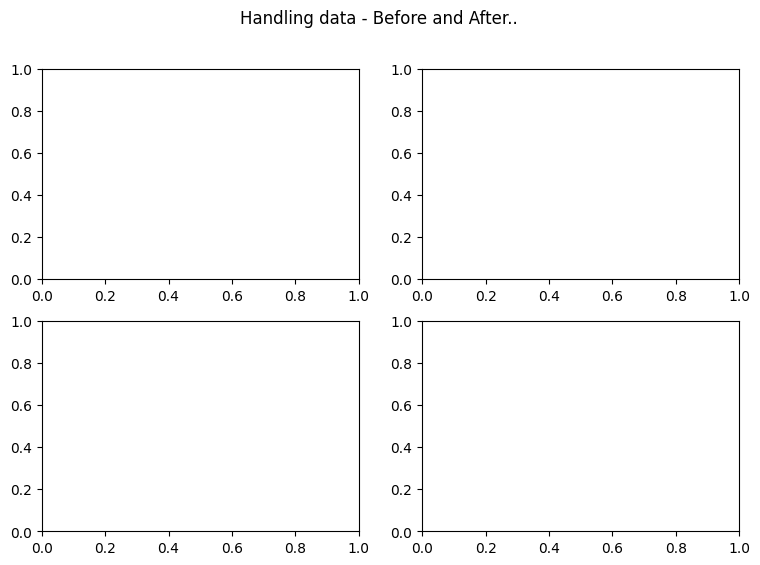

In [89]:
##Handle Skewness 
import seaborn as sns
fig , axes = plt.subplots(2,2)
fig.suptitle("Handling data - Before and After..")
sns.histplot(ax = axes[0,0],data = df['	Phy_marks	'],kde =True)
sns.histplot(ax = axes[0,1],data = df['	chem_marks	'],kde =True)
print("Yeo - Johnson_")
for i in df.columns:
    print(i,"Skew value : ",df[i].skew())



from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize = True)
for i in df.columns:
    df[i] = pt.fit_transform(df[[i]])
    print(i,"Skew value : ",df[i].skew())

import seaborn as sns
sns.histplot(ax = axes[1,0],data = df['Maths'],kde =True)
sns.histplot(ax = axes[1,1],data = df['Science'],kde =True)
plt.tight_layout()
plt.show()


sns.heatmap(df.corr(),fmt = '.2f' ,annot = True)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
for i in df.columns:
        df[i] = mms.fit_transform(df[[i]])

print("First 5 rows : \n",df.head())

    Rollno       Name Gender Branch  Attendence  Phy_marks  Che_marks  \
0        1   Mohammed      M   Comp          72       62.0       98.0   
1        2    Reyansh      M     IT          58       62.0       83.0   
2        3      Aarav      M     IT          57      -20.0      100.0   
3        4     Atharv      M     IT          60       89.0       83.0   
4        5     Vivaan      M   Comp          85       90.0        NaN   
5        6      Advik      M   ENTC          94       99.0       84.0   
6        7       Ansh      M   ENTC          98       88.0       95.0   
7        8     Ishaan      M   ENTC          75       66.0       51.0   
8        9      Dhruv      M   ENTC          63        NaN        NaN   
9       10  Siddharth      M   ENTC          96       67.0       78.0   
10      11     Vihaan      M   ENTC          82       54.0       70.0   
11      12        NaN      M     IT          75       64.0       67.0   
12      13     Aarush      M     IT          67    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1568\4133002933.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean() ,inplace =True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1568\4133002933.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

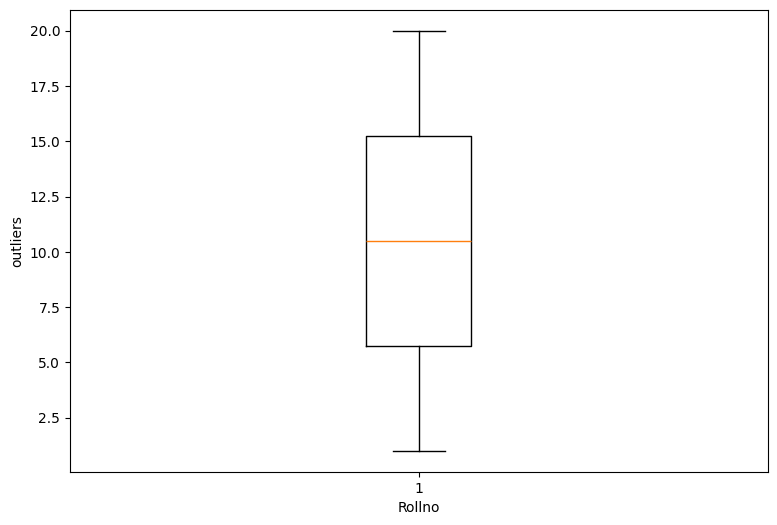

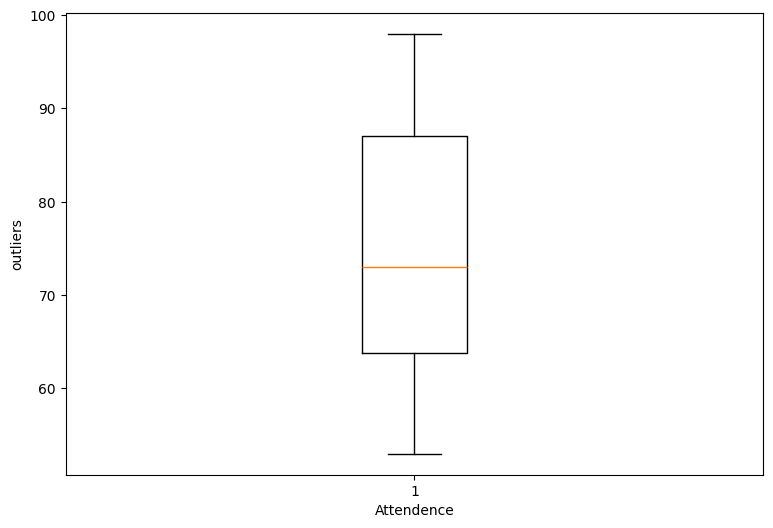

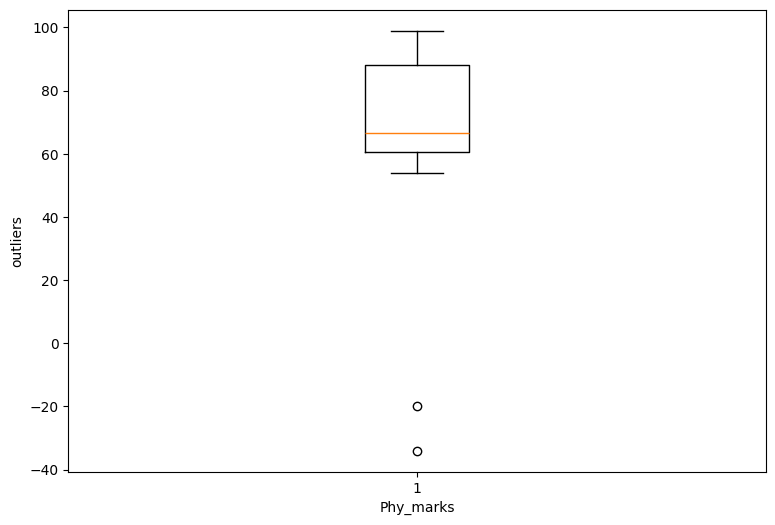

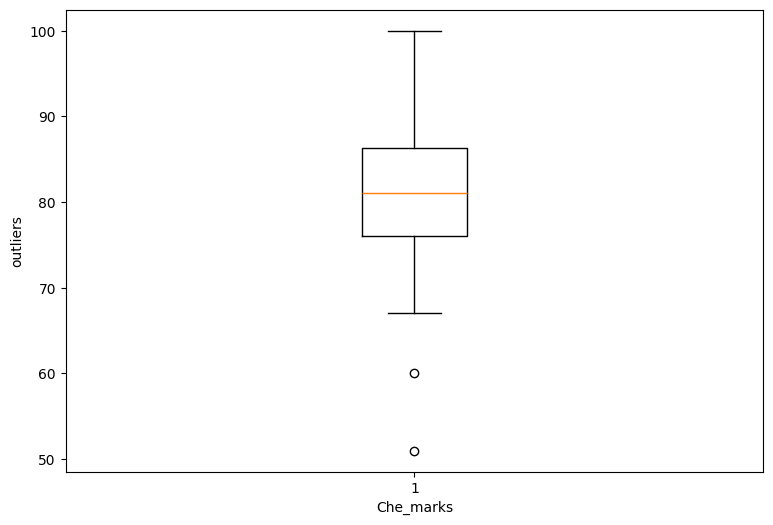

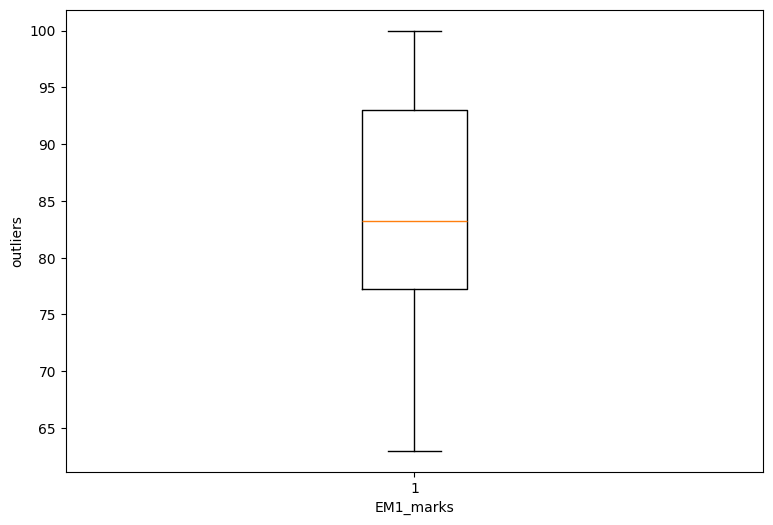

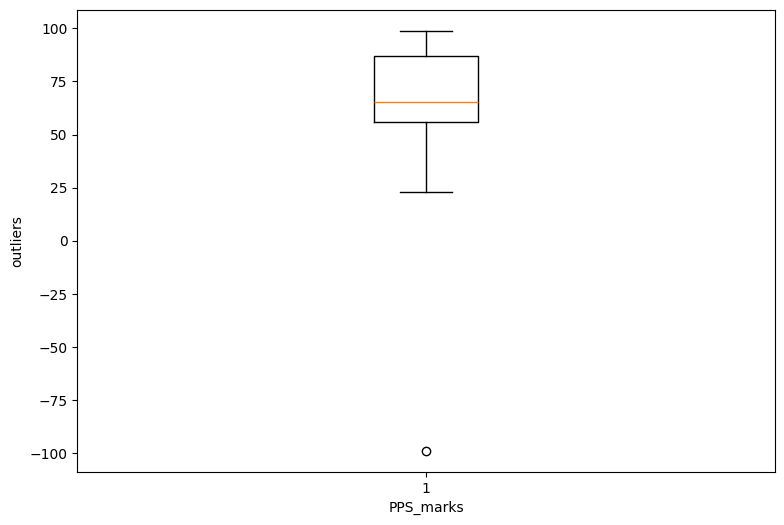

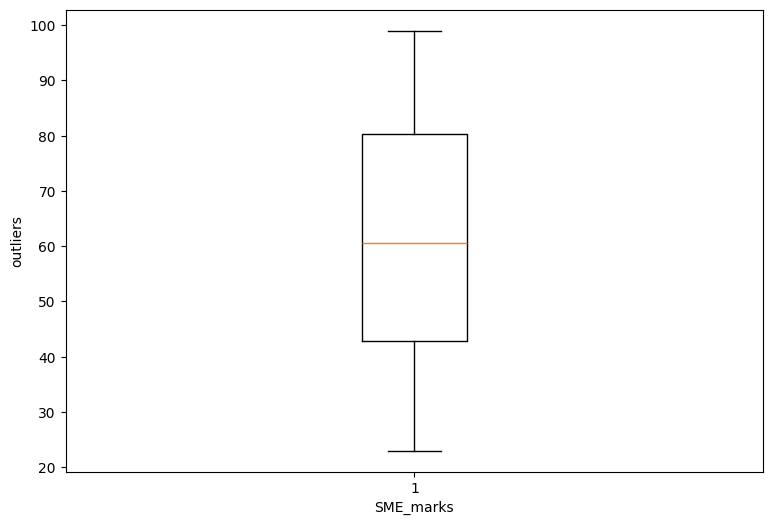

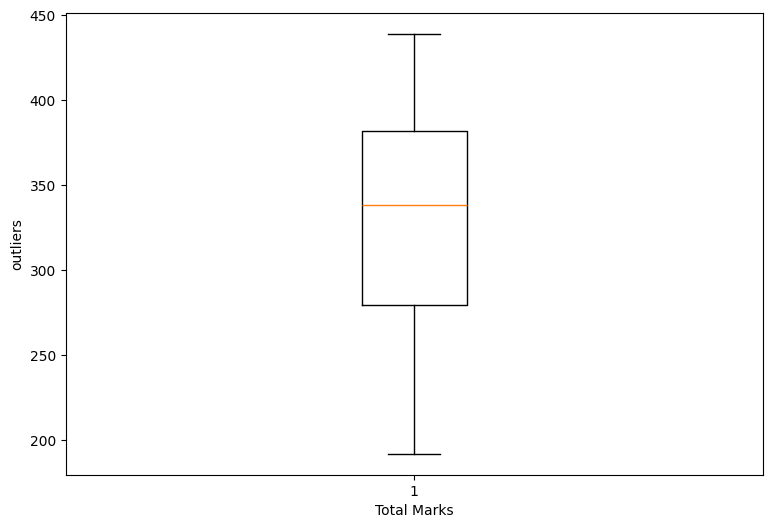

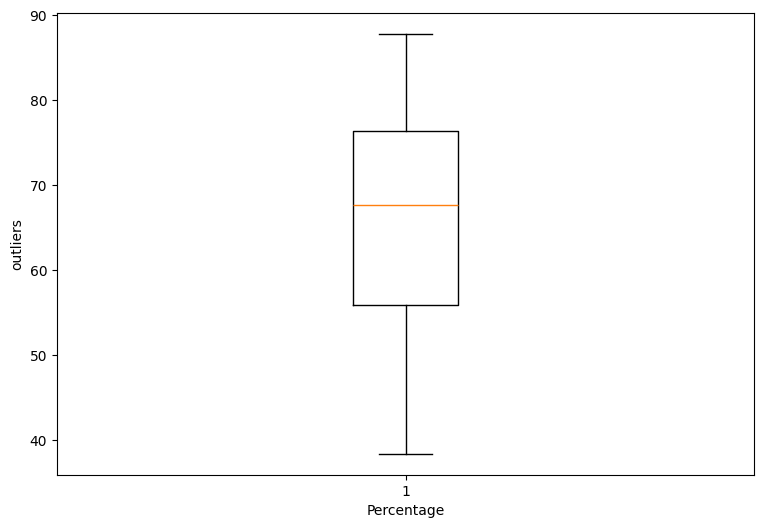

Box plot before removing oulier :


KeyError: 'Maths'

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Academic-Performance-Dataset - Academic-Performance-Dataset (2).csv")
df=pd.DataFrame(data)
print(df)



print("First 5 rows : \n",df.head())
print("last 5 rows : \n",df.tail())
print("any 5 rows : \n",df.sample(5))
print("Information : \n",df.info())
print("Data types of column : \n",df.dtypes)
print("Name of the columns :\n",df.columns)
print("Shape of the dataset : ",df.shape,"Size of the dataset : ",df.size)

#Statistical info

print("Statistical information : ",df.describe())

df['Gender'] = df['Gender'].str.upper()

print("\n\n",df.head())
#Find missing values 
print("Missing values :\n",df.isnull().sum())
for i in df.columns :
    if(df[i].dtypes == 'object'):
        df[i].fillna(df[i].mode()[0],inplace= True)
    else :
        df[i].fillna(df[i].mean() ,inplace =True)

print("Missing values :\n",df.isnull().sum())

for i in df.columns :
    if(df[i].dtypes != 'object'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('outliers')
        plt.show()


def RemoveOutlier(df , var):
    print("Box plot before removing oulier :")
    plt.boxplot(df[var])
    plt.xlabel(var)
    plt.ylabel('outliers')
    plt.show()
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR
    df = df[(df[var] >= low)&(df[var]<=high)]
    print("Box plot after removing oulier :")
    plt.boxplot(df[var])
    plt.xlabel(var)
    plt.ylabel('outliers')
    plt.show()
    #return df

RemoveOutlier(df,'Maths')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if (df[i].dtypes == 'object'):
        df[i] = le.fit_transform(df[i])

print(df)

##Handle Skewness 
import seaborn as sns
fig , axes = plt.subplots(2,2)
fig.suptitle("Handling data - Before and After..")
sns.histplot(ax = axes[0,0],data = df['Maths'],kde =True)
sns.histplot(ax = axes[0,1],data = df['Science'],kde =True)
print("___Yeo - Johnson__")
for i in df.columns:
    print(i,"Skew value : ",df[i].skew())



from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize = True)
for i in df.columns:
    df[i] = pt.fit_transform(df[[i]])
    print(i,"Skew value : ",df[i].skew())

import seaborn as sns
sns.histplot(ax = axes[1,0],data = df['Maths'],kde =True)
sns.histplot(ax = axes[1,1],data = df['Science'],kde =True)
plt.tight_layout()
plt.show()


sns.heatmap(df.corr(),fmt = '.2f' ,annot = True)